In [1]:
import requests
import zipfile
import io

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"

# Download the dataset
print("Downloading dataset...")
r = requests.get(url)
r.raise_for_status()

# Unzip the dataset
print("Unzipping dataset...")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

print("Dataset downloaded and unzipped successfully.")

Unzipping dataset...
Dataset downloaded and unzipped successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the training data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None, names=['activity'])

# Load the test data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None, names=['activity'])

# Load the activity labels
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])
activity_names = activity_labels['activity_name'].tolist()

print("Data loaded successfully.")

/tmp/ipython-input-2893907678.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-2893907678.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None, names=['activity'])
/tmp/ipython-input-2893907678.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


Data loaded successfully.


/tmp/ipython-input-2893907678.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None, names=['activity'])
/tmp/ipython-input-2893907678.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])


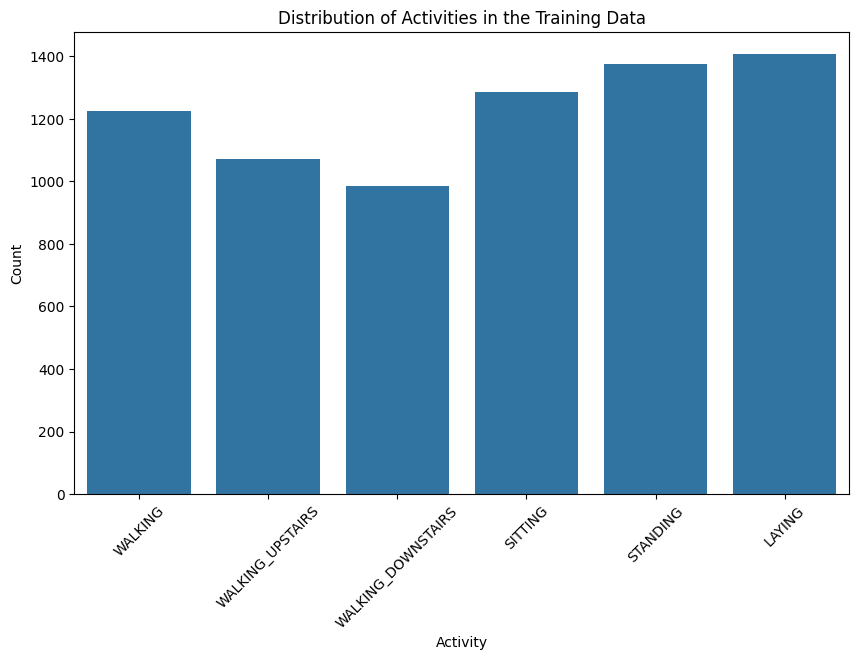

In [3]:
# Map activity IDs to activity names
y_train_named = y_train['activity'].map(dict(enumerate(activity_names, 1)))

# Plot the distribution of activities
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_named, order=activity_names)
plt.title('Distribution of Activities in the Training Data')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

print("Model trained successfully!")

Model trained successfully!


Accuracy: 0.9257


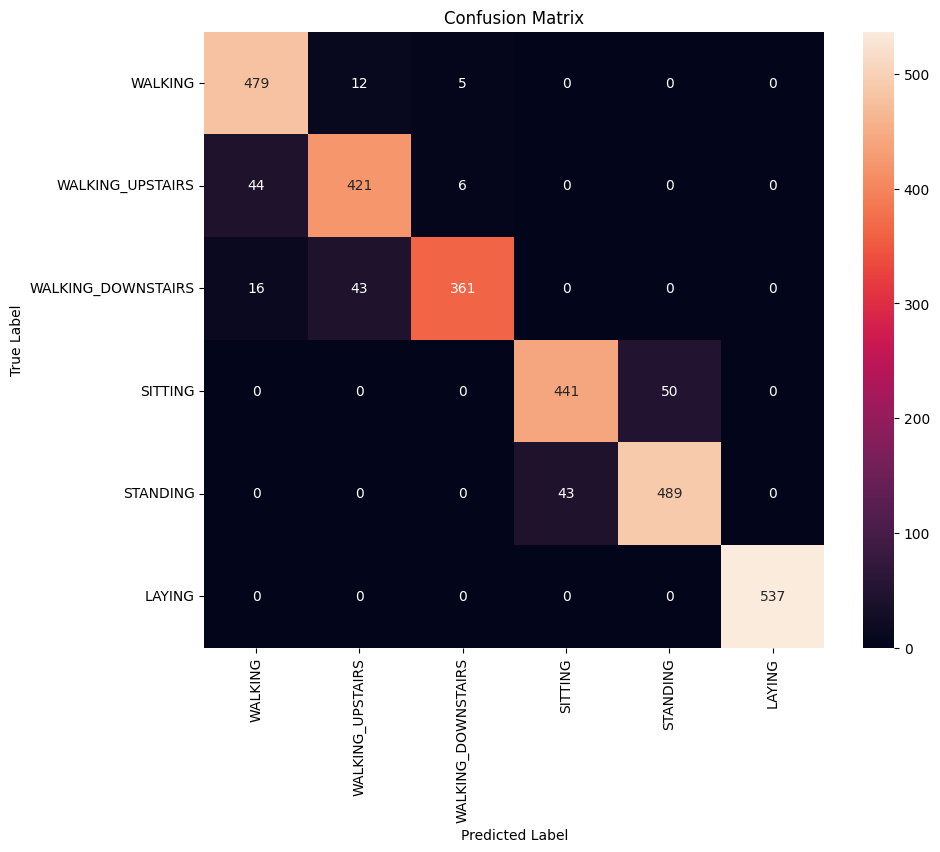


Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.89      0.97      0.93       496
  WALKING_UPSTAIRS       0.88      0.89      0.89       471
WALKING_DOWNSTAIRS       0.97      0.86      0.91       420
           SITTING       0.91      0.90      0.90       491
          STANDING       0.91      0.92      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



In [5]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=activity_names, yticklabels=activity_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=activity_names))

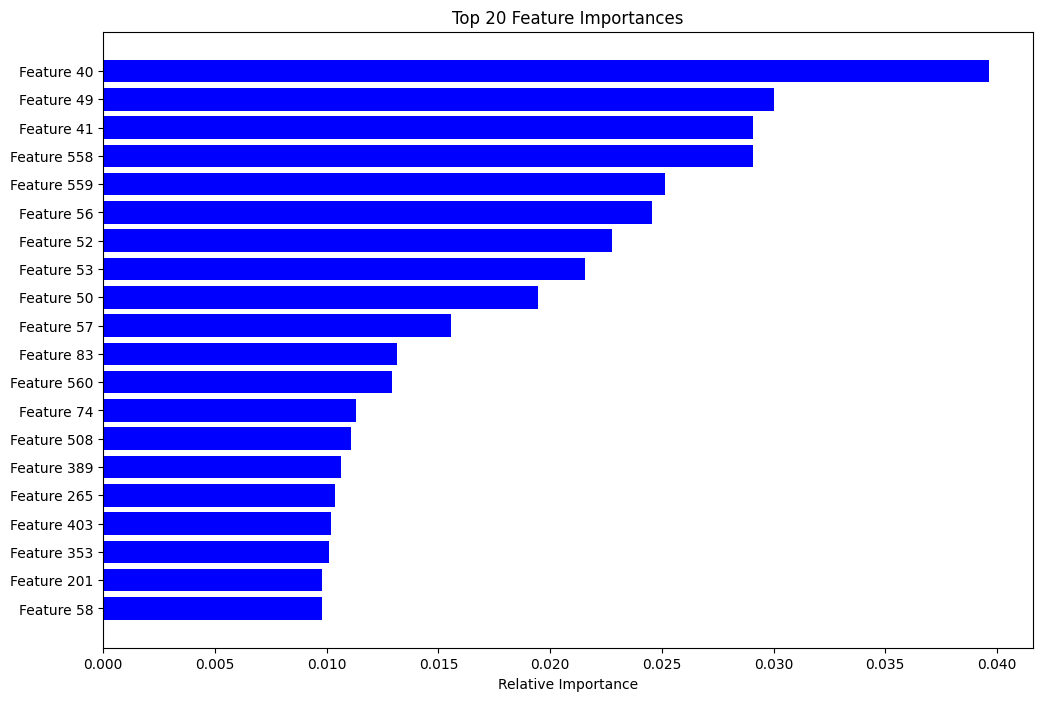

In [6]:
# Cell 6: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(12, 8))
plt.title('Top 20 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
plt.xlabel('Relative Importance')
plt.show()